In [10]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import odeint

### Fourier Transform 

* The fourier transform integral is essentially the limit of a fourier series as the length of the domain goes to infinity i.e. $(L \rightarrow \infty)$

* The fourier transform is valid for generic non periodic fucntions.

* The fourier series (defind on period fucntion in $[-L,L]$): 

  $f(x) = \frac{a_0}{2} + \sum_{k=1}^{\infty} (a_k cos(\frac{k\pi x}{L}) + b_k sin(\frac{k\pi x}{L}) ) = \sum_{k= -\infty}^{\infty} c_k e^{\frac{ik\pi x}{L}} \\$ where
  $c_k = \frac{1}{2L} \int_{-L}^L f(x) e^{-ikx/L}$

* The discrete frequencies in the above expression are given by: $\omega_k = \frac{k\pi}{L}$, therefore $\Delta \omega = \frac{\pi}{L}$ and when $L \rightarrow \infty, \Delta \omega \rightarrow d \omega \\$

* $f(x) = lim_{\Delta \omega \rightarrow 0} \sum_{k=-\infty}^{\infty} \frac{\Delta \omega}{ 2 \pi} \int_{\frac{-\pi}{\Delta \omega}}^{\frac{\pi}{\Delta \omega}} f(\zeta) e^{-i k \Delta \omega \zeta} d \zeta \hspace{0.2 cm} e^{i k \Delta \omega x}\\$

* $f(x) = F^{-1}(\hat{f}(\omega)) = \frac{1}{2 \pi} \int_{-\infty}^{\infty} \hat{f}(\omega) e^{i \omega x} d\omega$

* $\hat{f}(\omega) = F(f(x)) = \int_{-\infty}^{\infty} f (x) e^{-i \omega x} dx$

### Properties of fourier transforms:

* The derivative of a function is sometimes easier in the Fourier transformed domain 

    $F(\frac{d f(x)}{dx}) = i\omega F(f(x)) = i\omega \hat{f}(\omega)$

* Fourier transform help to convert PDE into ODE 

    $u_{tt}(x,t) = c u_{xx}(x,t) \Rightarrow \hat{u}_{tt}(\omega, t) = -c \omega^2 \hat{u} (\omega, t)\\$
    This decouples the space coordinates from the time and resulting set of ODE for each freq($\omega$)

* Linearity:

    $F(\alpha f(x) + \beta g(x)) = \alpha F(f(x)) + \beta F(g(x))$

* The convolution of two functions is particularly well behaved in FT domain 

    Convolution of $f(x)$ and $g(x)$ is: $f(x)*g(x) = \int_{-\infty}^{\infty}f(x-\zeta)g(x) d \zeta \\$
    $F(f(x) * g(x)) = \hat{f}(\omega) \hat{g}(\omega) \Rightarrow$ convolution in fourior domain is just multplication of two fucntions 


* Parseval's Theorem:  
    $\int_{\infty}^{\infty}|\hat{f}(\omega)|^2 d \omega = 2 \pi \int_{-\infty}^{\infty} |f(x)|^2 dx$

### Discrete Fourior Transform(DFT)

* DFT is discritized version of the Fourior series for vector of data $f = [f_1, f_2, f_3 ,.....,f_n]^T$, where $f_i=f(x_i)$

* $f_k = \frac{1}{n}\sum_{j=0}^{n-1} \hat{f_j} e^{\frac{i 2 \pi k j}{n}}$, where $\hat{f_k} = \sum_{j=0}^{n-1} f_j e^{\frac{-i 2 \pi k j}{n}}$ 

* DFT: $ [f_1, f_2, f_3 ,.....,f_n] \Rightarrow [\hat{f_1}, \hat{f_2},\hat{f_3} ,.....,\hat{f_n}]$

* DFT matrix can be written in terms of fundemnetal frequancy $ \omega_n = e^{\frac{-i 2 \pi}{n}}$ as follows:

$\begin{bmatrix}
\hat{f_0} \\
\hat{f_1} \\
\hat{f_1}\\
    .\\
    .\\
    .\\
    \hat{f_{n-1}}
\end{bmatrix} = 
\begin{bmatrix}
1 & 1 & 1 & . & . & 1 \\
1 & \omega_n & \omega_n^2 & . & . & \omega_n^{(n-1)}    \\
1 & \omega_n^2 & \omega_n^4 & . & . & \omega_n^{2(n-1)} \\
1 & \omega_n^4 & \omega_n^6 & . & . & \omega_n^{4(n-1)} \\
1 & . & . & . & . & . \\
1 & . & . & . & . & . \\
1 & \omega_n^{(n-1)} & \omega_n^{2(n-1)(n-1)} & . & . & \omega_n^{(n-1)(n-1)}
\end{bmatrix} \begin{bmatrix}
f_0 \\
f_1 \\
f_1 \\
    .\\
    .\\
    .\\
f_{n-1}
\end{bmatrix} $


* calculating the above DFT matrix is expensive in computation $O(n^2)$

* The FFT is used to calcualte the DFT matrix with fast computation $O(n log(n))$

In [2]:
# calculate the DFT matrix 

n = 6
omega_0 = np.exp(-1j*2*np.pi/n)              # base frequancy 

K,J = np.meshgrid(np.arange(n),np.arange(n)) # create a meshgrid of k and j indices 
DFT = np.power(omega_0,K*J)                  # evaluate the DFT matrix on the grid 
np.real(DFT)                                 # the real part of the DFT matrix 

array([[ 1. ,  1. ,  1. ,  1. ,  1. ,  1. ],
       [ 1. ,  0.5, -0.5, -1. , -0.5,  0.5],
       [ 1. , -0.5, -0.5,  1. , -0.5, -0.5],
       [ 1. , -1. ,  1. , -1. ,  1. , -1. ],
       [ 1. , -0.5, -0.5,  1. , -0.5, -0.5],
       [ 1. ,  0.5, -0.5, -1. , -0.5,  0.5]])

## FFT applications

### 1. Denoising the data using FFT 

* Do FFT on data points: $ [f_1, f_2, f_3 ,.....,f_n] \Rightarrow [\hat{f_1}, \hat{f_2},\hat{f_3} ,.....,\hat{f_n}]$

* Find the spectral density (PSD) using $\hat{f_i} \times \hat{f_i}^*$ for each $i$

* Set a threshold to filter out the smaller fourier coeffcienits: i.e. if $PDS_i > \eta$ then select $\hat{f_i}$ and zeros all the other coefficients otherwise

* Finally do iFFT to non zero coeffcients and get back to time(or spatial) domain 

Text(0.5, 0, 'freq(Hz)')

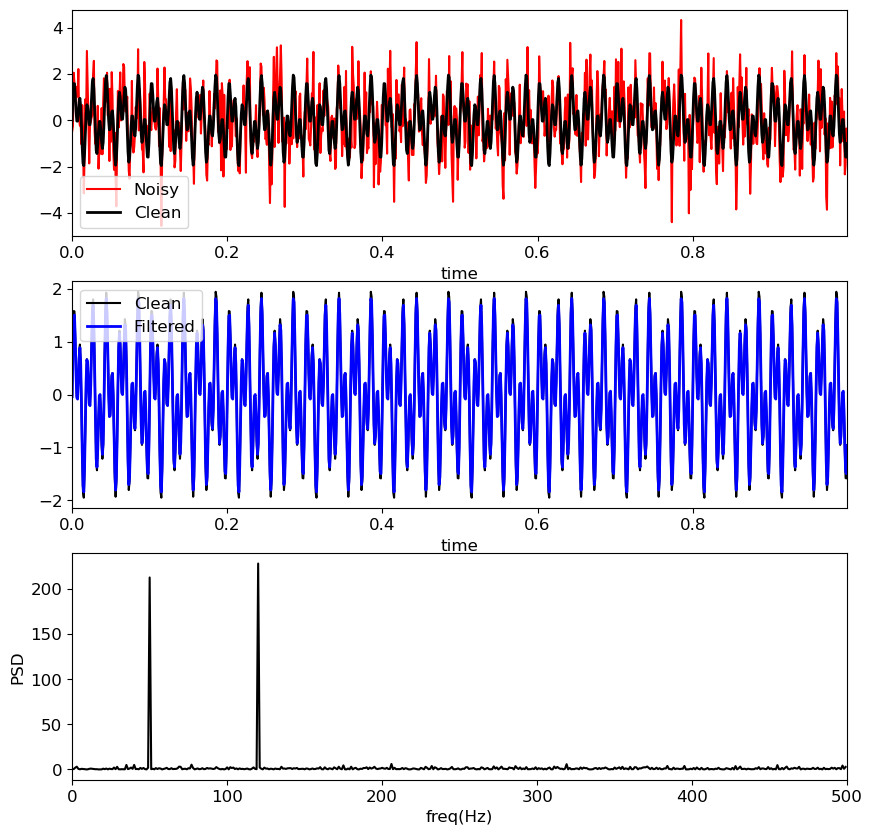

In [6]:
# De-noising the data using FFT 

# generate noisy data 
dt = 0.001
t  = np.arange(0,1,dt)
f = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t)  # time domain clean signal 
f_clean = f                                       # clean data is sum of two sines with different freq.(50, 120)
f = f + np.random.randn(len(t))                   # add a gausian noise 

# find the FFT 
n = len(t)
fhat = np.fft.fft(f,n)                            # compute the FFT 
PSD  = fhat * np.conj(fhat)/n                     # spectral density 
freq = (1/(n*dt)) * np.arange(n)                  # freq vector in Hz (note that f_0 = 1/T, where T = n * dt)

# use PSD to filter out the noise 
inds = PSD > 100                                  # indices that has spectral power > 100 
filt_fhat = fhat * inds                           # filtered freq. (freq. which has power density > 100)
ffilt = np.fft.ifft(filt_fhat)                    # inverse fft to get the filtered function in the time domain 

# plot data 

plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams.update({'font.size': 12})

fig,axs = plt.subplots(3,1)


plt.sca(axs[0])
plt.plot(t,f,color='r',linewidth=1.5,label='Noisy')
plt.plot(t,f_clean,color='k',linewidth=2,label='Clean')
plt.xlim(t[0],t[-1])
plt.xlabel('time')
plt.legend()

plt.sca(axs[1])
plt.plot(t,f_clean,color='k',linewidth=1.5,label='Clean')
plt.plot(t,ffilt,color='b',linewidth=2,label='Filtered')
plt.xlim(t[0],t[-1])
plt.xlabel('time')
plt.legend()

plt.sca(axs[2])
plt.plot(freq[:int(n/2)],PSD[:int(n/2)],color='k',linewidth=1.5)
plt.xlim(0,freq[int(n/2)])
plt.ylabel('PSD')
plt.xlabel(r'freq(Hz)')

### 2. Spectral derivative using FFT

* $F(\frac{d f(x)}{dx}) = i\kappa F(f(x)) = i\kappa \hat{f}(\kappa)$, where $\kappa$ is spatial freq.

* Spatial freq. $\kappa = \frac{2 \pi}{L}$ or equivalently for the time freq ($\omega = \frac{2 \pi}{T}$)

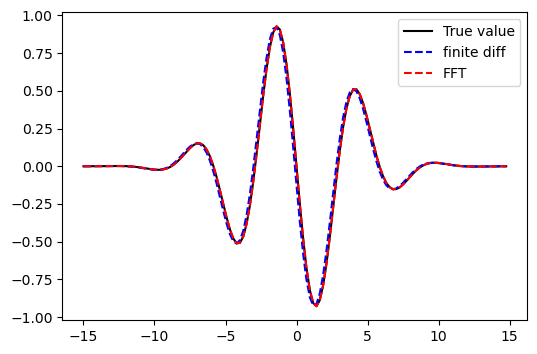

In [9]:
n = 128
L = 30 
dx = L/n
x = np.arange(-L/2,L/2,dx)                                    # x domain 

f = np.cos(x) * np.exp(-np.power(x,2)/25)                     # f(x)
dfdx = -(np.sin(x) * np.exp(-np.power(x,2)/25) + (2/25)*x*f)  # df/dx


# finite difference derivatives 
dfdx_finite = (f[1:] - f[:-1])/dx 
dfdx_finite = np.append(dfdx_finite,f[-1])

# derrivate using FFT (spectral derivatives)
f_hat = np.fft.fft(f)                                         # f_hat 
kappa = (2 * np.pi/L) * np.arange(-n/2,n/2)                   # kappa 
kappa = np.fft.fftshift(kappa)                                # re-order the fft frequancies according to the order of FFT coefficients 
dfhat =  (1j)*kappa * f_hat                                   # df/dx in the fourier space 
dfFFT = np.real(np.fft.ifft(dfhat))                           # get back the derrivative to spatial domain 

# plot 
plt.rcParams['figure.figsize'] = [6, 4]
plt.rcParams.update({'font.size': 10})

plt.plot(x,dfdx,'-k', label='True value')
plt.plot(x,dfdx_finite,'--b',label='finite diff')
plt.plot(x,dfFFT.real,'--r', label='FFT')
plt.legend()

### 3. Solve PDE using FFT: Heat equation:

* $u_t(x,t) = \alpha^2 u_{xx}(x,t)$, taking the fourior transform in space this becomes
* $\hat{u}_t(t,\kappa) = -\alpha \kappa^2 \hat{u}(t,\kappa)$, where, $F(u(x,t)) = \hat{u}(\kappa,t)$ and we use scipy odient to solve this ODE
* The fourior trsnformed eq is not a PDE, its a set ODEs for each freq. $\kappa$ and $\hat{u}(t,\kappa) = -e^{-\alpha ^2 \kappa^2 t} \hat{u}(0,\kappa)$ 
* We can go back to the spatial domain by iFFT: $\hat{u}(t,\kappa) = u(t,x)$

In [11]:
a = 1                           # thermal diffusion coeffcient 
L = 100                         # length of the domain 
N = 1000                        # no of discretization points 
dx = L/N                        # step size 
x = np.arange(-L/2,L/2,dx)      # x domain 

kappa = 2 * np.pi * np.fft.fftfreq(N,dx)

# initial condition  (assuming intial temp distribution is a step)
u_0 = np.zeros_like(x)
u_0[int((L/2 -L/10)/dx):int((L/2 + L/10)/dx)] = 1
uhat_0 = np.fft.fft(u_0)
# scipy odint function doesn't work well with imaginary numbers, so create array of real numbers 
# concatenating real and imaginary parts to one array 
uhat_0_ri = np.concatenate((uhat_0.real,uhat_0.imag)).astype('float64')
dt = 0.1 
t  = np.arange(0,10,dt)

def rhsHeat(u_hat_ri,t,kappa,a):
    uhat = u_hat_ri[:N] + (1j)* u_hat_ri[N:]
    duhat_dt = -a * np.power(kappa,2) * uhat
    duhat_dt_ri = np.concatenate((duhat_dt.real,duhat_dt.imag)).astype('float64')
    return duhat_dt_ri

uhat_ri = odeint(rhsHeat,uhat_0_ri,t,args=(kappa,a))
uhat = uhat_ri[:,:N] + (1j)*uhat_ri[:,N:]

u = np.zeros_like(uhat)

for k in range(len(t)):
    u[k,:] = np.fft.ifft(uhat[k,:])

u = u.real

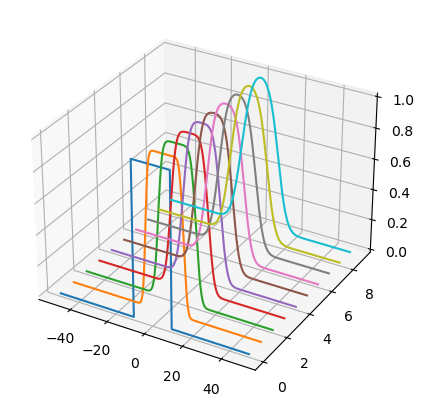

In [13]:
# plot the data 
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111,projection='3d')

u_plot = u[::10,:]

for j in range(u_plot.shape[0]):
    y = j * np.ones(u_plot.shape[1])
    ax.plot(x,y,u_plot[j,:])